In [1]:
import os
import numpy as np
import torch as tr

from CSWSEM import *
from matplotlib import pyplot as plt

In [2]:
gs_name = 'absem'

todo
- include training condition in gsdata
- switch model tag from nosplit to SEM/LSTM

In [3]:
from glob import glob as glob
import pandas as pd

def make_gsdf(gs_name):
  gs_dir = "gsdata/%s/"%gs_name
  fpathL = glob(gs_dir+'*')
  seed_df_L = []
  for fpath in fpathL:
    condition = fpath.split('/')[-1].split('__')[1].split('_')[1]
    seed_df = pd.read_csv(fpath)
    seed_df.loc[:,'model'] = ['LSTM','SEM'][sum(seed_df.loc[:,'nosplit']==1)>0]
    seed_df.loc[:,'condition'] = condition
    seed_df_L.append(seed_df)
  gsdf = pd.concat(seed_df_L)
  gsdf.index = np.arange(len(gsdf))
  gsdf.drop(columns=['Unnamed: 0','like','prior'])
  return gsdf

In [8]:
gsdf = make_gsdf(gs_name)

In [17]:
def build_dataD(gsdf):
  verb=True
  dataD = {
    'LSTM':{
      'blocked':{},
      'interleaved':{}
               },
    'SEM':{
      'blocked':{},
      'interleaved':{}
              },
       }
  for m,m_df in gsdf.groupby(['model']):  
    model=m
    for c,c_df in p_df.groupby('condition'):
      cond=c
      for p,p_df in m_df.groupby(['learn_rate','alfa','lmda']):
        param_str = "-".join([str(p_i) for p_i in p])
        if verb: print(model,param_str,cond)
        sgroup = c_df.groupby('seed')
        seed_arr = -np.ones([len(sgroup),200])
        for s_idx,(s,s_df) in enumerate(sgroup):
          seed_arr[s_idx] = s_df.loc[:,'loss']
        dataD[model][cond][param_str] = seed_arr
  return dataD
build_dataD(gsdf)

UnboundLocalError: local variable 'p_df' referenced before assignment

In [15]:
# param
dataD['LSTM']['blocked'].keys()

dict_keys(['0.005-0.1-0.1', '0.005-0.1-1.0', '0.005-0.1-10.0', '0.005-1.0-0.1', '0.005-1.0-1.0', '0.005-1.0-10.0', '0.005-10.0-0.1', '0.005-10.0-1.0', '0.005-10.0-10.0'])

In [434]:
"""
want to construct a np array dimensions correspond
to (model,condition,param,seed,time)
critically important that `param` matches
between different model-condition 
"""

for m,m_df in gsdf.groupby(['model]):
  print(m)
  for p,p_df in m_df.groupby(['learn_rate','lmda','alfa']):
    print(p)
    seed_group = p_df.groupby('seed')
    n_seeds = len(seed_group)
    print(n_seeds)
    seed_loss_arr = np.ones([n_seeds,200])
    for n_idx,(s,s_df) in enumerate(seed_group):
      seed_loss_arr[s-1] = s_df.loss.values


('LSTM', 'blocked')
(0.005, 0.1, 0.1)
101
(0.005, 0.1, 1.0)
101
(0.005, 0.1, 10.0)
101
(0.005, 1.0, 0.1)
101
(0.005, 1.0, 1.0)
101
(0.005, 1.0, 10.0)
101
(0.005, 10.0, 0.1)
101
(0.005, 10.0, 1.0)
101
(0.005, 10.0, 10.0)
101
('LSTM', 'interleaved')
(0.005, 0.1, 0.1)
39
('SEM', 'blocked')
(0.005, 0.0, 0.0)
3
(0.005, 99.0, 99.0)
101
('SEM', 'interleaved')
(0.005, 99.0, 99.0)
101


In [353]:
paramL = ['model','condition', 'learn_rate','lmda','alfa']

# conditions, param, seed, time
C,P,S,T = 2,100,101,200 

lstm_loss = -np.ones([C,P,N,T]) 
for p,p_df in gsdf.groupby(paramL):
  c_idx = int(p[1]=='blocked')
  
  for s_idx,(s,sp_df) in enumerate(p_df.groupby(['seed'])):
    print(s)
    lstm_loss[]
    
  

('LSTM', 'blocked', 0.005, 0.1, 0.1)
('LSTM', 'blocked', 0.005, 0.1, 1.0)
('LSTM', 'blocked', 0.005, 0.1, 10.0)
('LSTM', 'blocked', 0.005, 1.0, 0.1)
('LSTM', 'blocked', 0.005, 1.0, 1.0)
('LSTM', 'blocked', 0.005, 1.0, 10.0)
('LSTM', 'blocked', 0.005, 10.0, 0.1)
('LSTM', 'blocked', 0.005, 10.0, 1.0)
('LSTM', 'blocked', 0.005, 10.0, 10.0)
('LSTM', 'interleaved', 0.005, 0.1, 0.1)
('SEM', 'blocked', 0.005, 0.0, 0.0)
('SEM', 'blocked', 0.005, 99.0, 99.0)
('SEM', 'interleaved', 0.005, 99.0, 99.0)


,Unnamed: 0,trial,prior,like,active_schema,loss,nosplit,stsize,learn_rate,lmda,alfa,seed,model,condition
1200,0,0,[4.59511985 4.59511985],[-59.08302574 -59.08302574],0,0.426074,1,25,0.005,99.0,99.0,50,SEM,interleaved
1201,1,1,[4.65396035 4.59511985],[-40.5656676 -67.9543567],0,0.397482,1,25,0.005,99.0,99.0,50,SEM,interleaved
1202,2,2,[4.7095302 4.59511985],[-15.62326427 -59.08302574],0,0.321525,1,25,0.005,99.0,99.0,50,SEM,interleaved
1203,3,3,[4.76217393 4.59511985],[ -6.54432847 -73.60140209],0,0.328675,1,25,0.005,99.0,99.0,50,SEM,interleaved
1204,4,4,[4.81218436 4.59511985],[ 14.76403607 -59.08302574],0,0.265636,1,25,0.005,99.0,99.0,50,SEM,interleaved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229995,195,195,[7.14598447 4.59511985],[142.65243106 -97.75029558],0,0.072345,1,25,0.005,99.0,99.0,14,SEM,interleaved
229996,196,196,[7.15070146 4.59511985],[139.65223767 -83.37389398],0,0.091794,1,25,0.005,99.0,99.0,14,SEM,interleaved
229997,197,197,[7.1553963 4.59511985],[ 89.89320114 -98.06689373],0,0.169207,1,25,0.005,99.0,99.0,14,SEM,interleaved
229998,198,198,[7.16006921 4.59511985],[135.09384786 -97.75029558],0,0.075829,1,25,0.005,99.0,99.0,14,SEM,interleaved


In [340]:


for i,j in gsdf.groupby(paramL):
  j
  
for a,b in j.groupby('seed'):
  a
b

,Unnamed: 0,trial,prior,like,active_schema,loss,nosplit,stsize,learn_rate,lmda,alfa,seed,model,condition
135800,0,0,[4.59511985 4.59511985],[-39.47246455 -39.47246455],0,0.537138,1,25,0.005,99.0,99.0,100,SEM,interleaved
135801,1,1,[4.65396035 4.59511985],[-82.70805534 -63.89411236],0,0.493186,1,25,0.005,99.0,99.0,100,SEM,interleaved
135802,2,2,[4.7095302 4.59511985],[-90.23806288 -54.60010942],0,0.508947,1,25,0.005,99.0,99.0,100,SEM,interleaved
135803,3,3,[4.76217393 4.59511985],[-54.96655117 -53.04896146],0,0.447045,1,25,0.005,99.0,99.0,100,SEM,interleaved
135804,4,4,[4.81218436 4.59511985],[-61.86763639 -54.60010942],0,0.439466,1,25,0.005,99.0,99.0,100,SEM,interleaved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135995,195,195,[7.14598447 4.59511985],[133.04291624 -53.04896146],0,0.095968,1,25,0.005,99.0,99.0,100,SEM,interleaved
135996,196,196,[7.15070146 4.59511985],[135.06499864 -53.04896146],0,0.094871,1,25,0.005,99.0,99.0,100,SEM,interleaved
135997,197,197,[7.1553963 4.59511985],[121.03783106 -39.47246455],0,0.120220,1,25,0.005,99.0,99.0,100,SEM,interleaved
135998,198,198,[7.16006921 4.59511985],[144.64649551 -63.89411236],0,0.073399,1,25,0.005,99.0,99.0,100,SEM,interleaved


In [210]:

paramL_t = paramL+['trial']

In [308]:
gsdf = make_gsdf(gs_name)

# df.loc[seed,trial]
lossdf = gsdf.pivot(index=['seed','trial'],
                columns=paramL,
                values=['loss']
               ).T

In [311]:
M = lossdf.mean(axis=1,level='trial')
S = lossdf.std(axis=1,level='trial')

In [328]:
M

trial                                             0         1         2    \
     condition   model learn_rate lmda alfa                                 
loss blocked     LSTM  0.005      10.0 0.1   0.584886  0.549331  0.509764   
                                       1.0   0.584886  0.548950  0.513140   
                                  0.1  0.1   0.584886  0.549331  0.509764   
                                       10.0  0.584886  0.554908  0.516667   
                                  1.0  10.0  0.584886  0.554908  0.516667   
     interleaved SEM   0.005      99.0 99.0  0.584886  0.536672  0.488935   
     blocked     SEM   0.005      0.0  0.0   0.568503  0.568251  0.443943   
     interleaved LSTM  0.005      0.1  0.1   0.570283  0.558505  0.518006   
     blocked     SEM   0.005      99.0 99.0  0.584886  0.531142  0.481369   
                 LSTM  0.005      0.1  1.0   0.584886  0.549895  0.513793   
                                  1.0  1.0   0.584886  0.549895  0.513793   
                                  10.0 10.0  0.584886  0.550881  0.514110   
                                  1.0  0.1   0.584886  0.549331  0.509764   

trial                                             3         4         5    \
     condition   model learn_rate lmda alfa                                 
loss blocked     LSTM  0.005      10.0 0.1   0.497772  0.468112  0.455554   
                                       1.0   0.500108  0.469696  0.457089   
                                  0.1  0.1   0.497772  0.468112  0.455554   
                                       10.0  0.503382  0.474949  0.460974   
                                  1.0  10.0  0.503382  0.474949  0.460974   
     interleaved SEM   0.005      99.0 99.0  0.489199  0.453370  0.455071   
     blocked     SEM   0.005      0.0  0.0   0.436786  0.456734  0.424688   
     interleaved LSTM  0.005      0.1  0.1   0.511181  0.506630  0.486004   
     blocked     SEM   0.005      99.0 99.0  0.462206  0.433716  0.412960   
                 LSTM  0.005      0.1  1.0   0.500378  0.469744  0.457615   
                                  1.0  1.0   0.500378  0.469744  0.457615   
                                  10.0 10.0  0.501903  0.473347  0.459756   
                                  1.0  0.1   0.497772  0.468112  0.455554   

trial                                             6         7         8    \
     condition   model learn_rate lmda alfa                                 
loss blocked     LSTM  0.005      10.0 0.1   0.453295  0.446137  0.425927   
                                       1.0   0.455111  0.445916  0.427252   
                                  0.1  0.1   0.453295  0.446137  0.425927   
                                       10.0  0.458729  0.447853  0.433882   
                                  1.0  10.0  0.458729  0.447853  0.433882   
     interleaved SEM   0.005      99.0 99.0  0.432316  0.431725  0.409524   
     blocked     SEM   0.005      0.0  0.0   0.370246  0.396663  0.339830   
     interleaved LSTM  0.005      0.1  0.1   0.463750  0.468128  0.449671   
     blocked     SEM   0.005      99.0 99.0  0.399660  0.392983  0.374351   
                 LSTM  0.005      0.1  1.0   0.455344  0.445889  0.427289   
                                  1.0  1.0   0.455344  0.445889  0.427289   
                                  10.0 10.0  0.457218  0.446200  0.432061   
                                  1.0  0.1   0.453295  0.446137  0.425927   

trial                                             9    ...       190  \
     condition   model learn_rate lmda alfa            ...             
loss blocked     LSTM  0.005      10.0 0.1   0.423732  ...  0.182572   
                                       1.0   0.425007  ...  0.187109   
                                  0.1  0.1   0.423732  ...  0.182572   
                                       10.0  0.429583  ...  0.188166   
                                  1.0  10.0  0.429583  ...  0.188166   
     interleaved SEM   0.005

TypeError: 'value' must be an instance of str or bytes, not a tuple

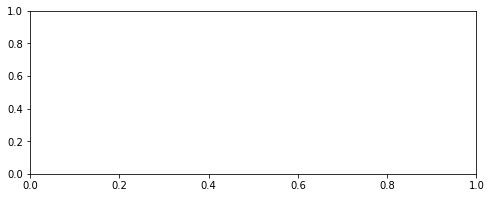

In [115]:
for param_tuple,acc_series in accdf.groupby(paramL): 

  param_str = '-'.join([str(i) for i in param_tuple])
  plt.figure(figsize=(8,3))
  plt.plot(acc_series,lw=10)
  plt.title(param_str)
  plt.ylim(0,1)
  plt.savefig('figures/gs-%s/loss-%s.png'%(gs_name,param_str))
  plt.close('all')

# import human data - model fits